In [19]:
# TO-Do
# feature selection -------> done
# removing outliers -------> done
# removing duplicates -----> done
# updated dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [21]:
data = pd.read_csv('E:\\final year project\\Diet Recommendation System\\recipes.csv')
# original dataset 

In [22]:
data.head(2)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."


In [23]:
pd.set_option('display.max_columns', 50)

In [24]:
data.loc[:4, :]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [25]:
columns_for_data = ['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']

In [26]:
columns_data = data[columns_for_data]
columns_data.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [27]:
columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               522517 non-null  int64  
 1   Name                   522517 non-null  object 
 2   CookTime               439972 non-null  object 
 3   PrepTime               522517 non-null  object 
 4   TotalTime              522517 non-null  object 
 5   RecipeIngredientParts  522517 non-null  object 
 6   Calories               522517 non-null  float64
 7   FatContent             522517 non-null  float64
 8   SaturatedFatContent    522517 non-null  float64
 9   CholesterolContent     522517 non-null  float64
 10  SodiumContent          522517 non-null  float64
 11  CarbohydrateContent    522517 non-null  float64
 12  FiberContent           522517 non-null  float64
 13  SugarContent           522517 non-null  float64
 14  ProteinContent         522517 non-nu

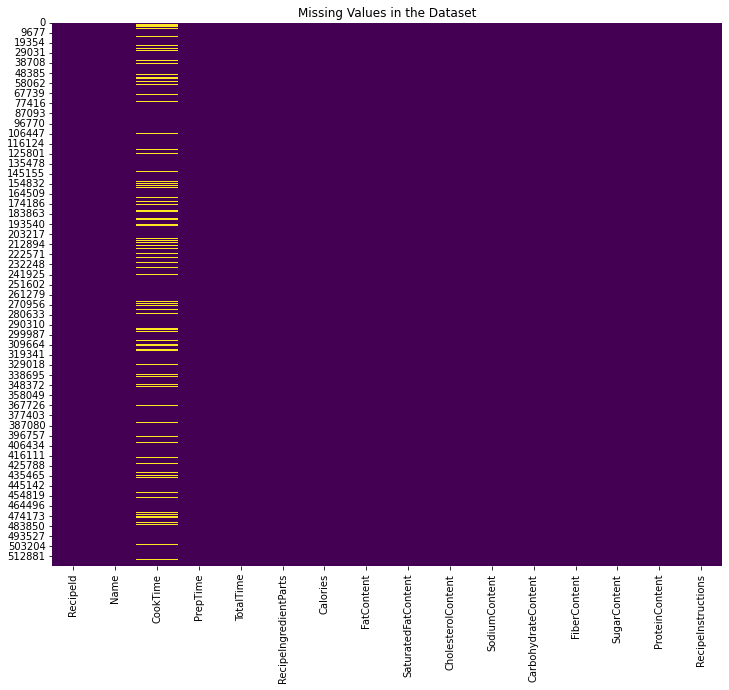

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(columns_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

# Outliers

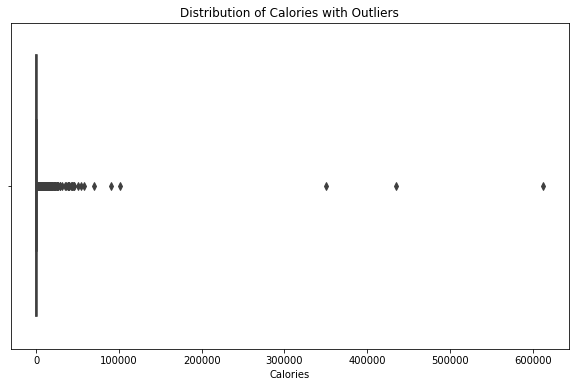

Number of outliers in Calories: 35905


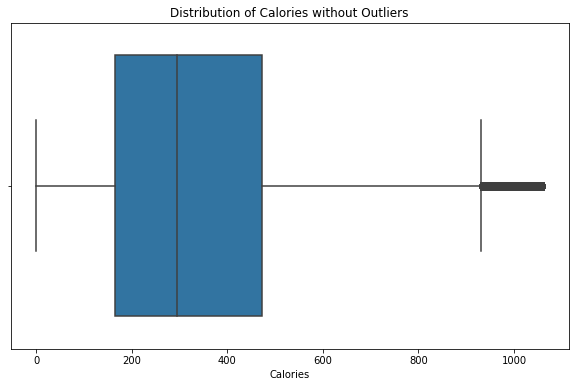

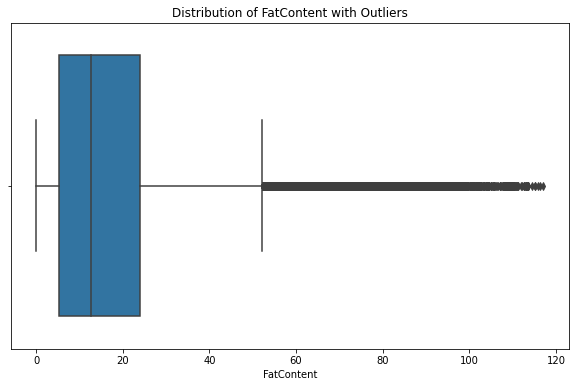

Number of outliers in FatContent: 18644


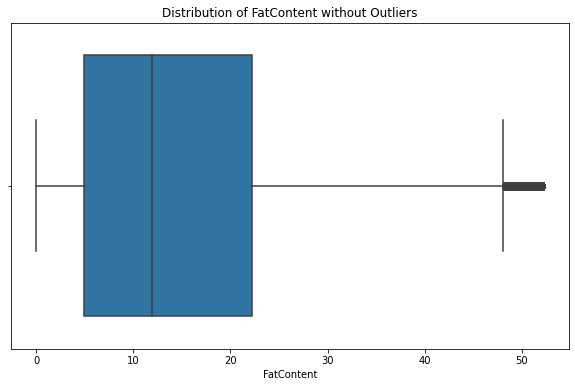

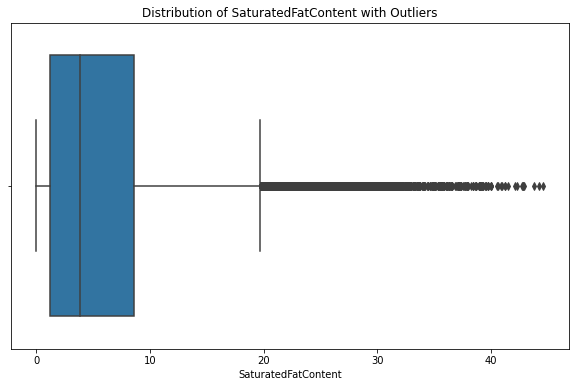

Number of outliers in SaturatedFatContent: 16804


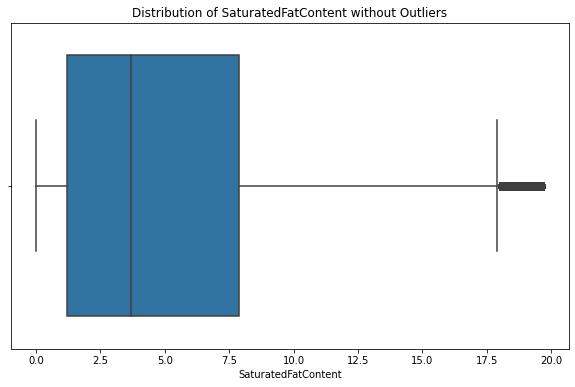

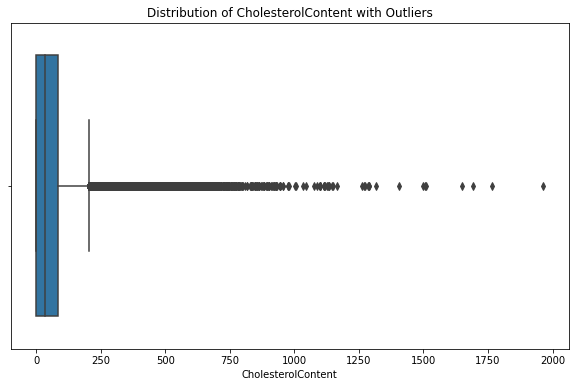

Number of outliers in CholesterolContent: 19495


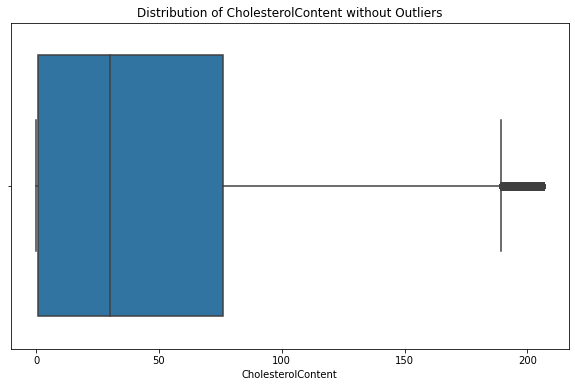

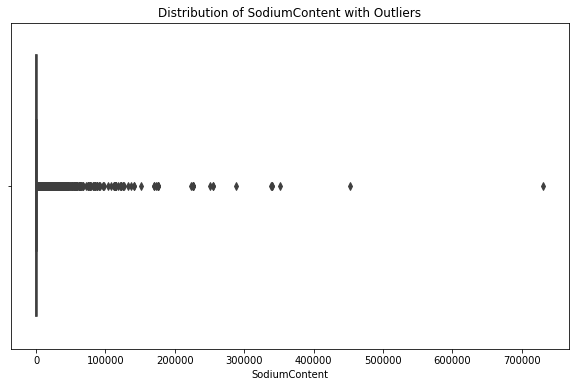

Number of outliers in SodiumContent: 24600


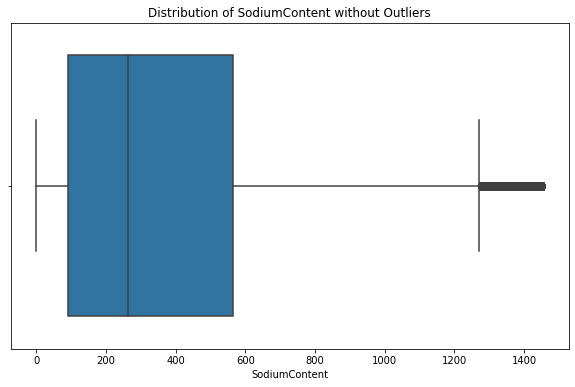

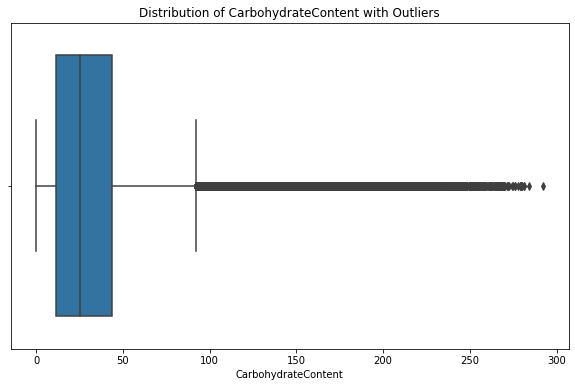

Number of outliers in CarbohydrateContent: 14971


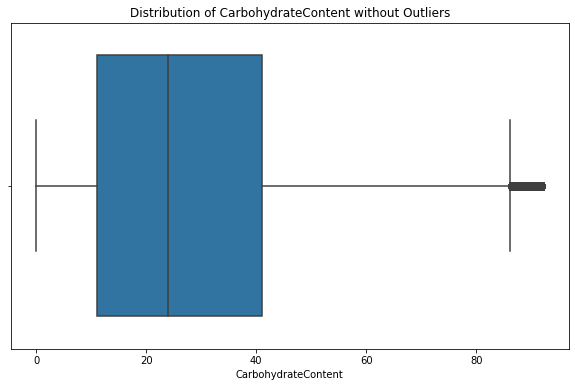

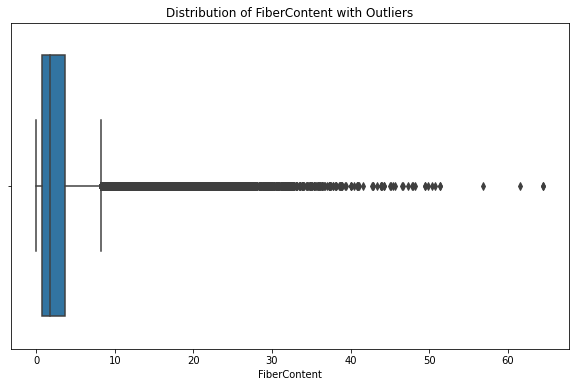

Number of outliers in FiberContent: 23451


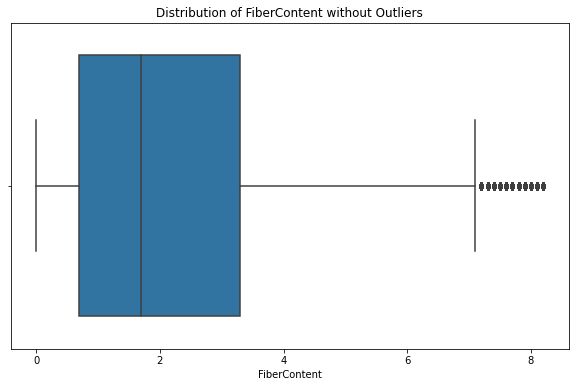

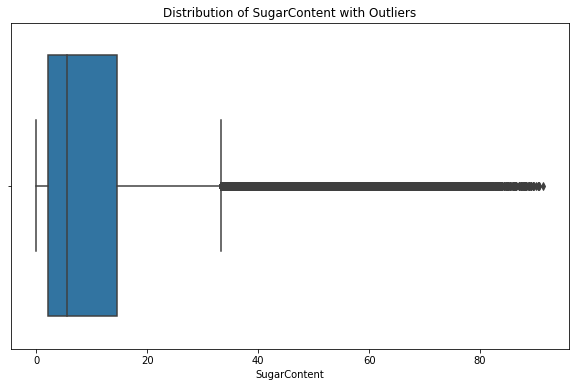

Number of outliers in SugarContent: 29599


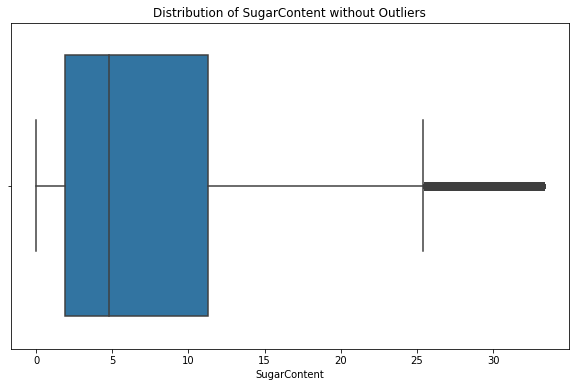

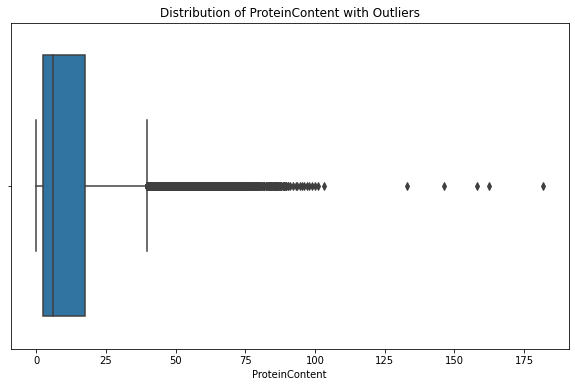

Number of outliers in ProteinContent: 13774


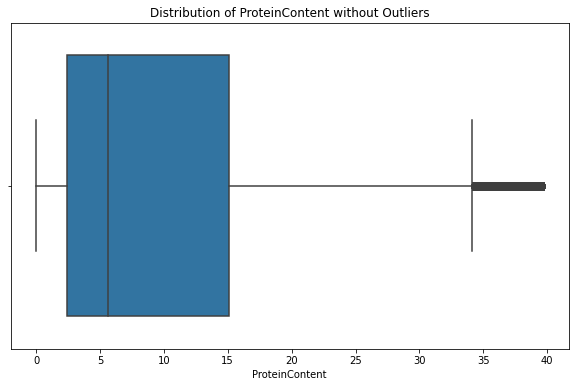

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame

columns_for_data1 = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

for feature in columns_for_data1:
    # Visualize the distribution before handling outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=columns_data)
    plt.title(f'Distribution of {feature} with Outliers')
    plt.show()

    # Identify and handle outliers using IQR (Interquartile Range)
    Q1 = columns_data[feature].quantile(0.25)
    Q3 = columns_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = columns_data[(columns_data[feature] < lower_bound) | (columns_data[feature] > upper_bound)]
    print(f'Number of outliers in {feature}: {len(outliers.index)}')

    # Remove outliers in the original DataFrame
    columns_data = columns_data[(columns_data[feature] >= lower_bound) & (columns_data[feature] <= upper_bound)]

    # Visualize the distribution after handling outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, data=columns_data)
    plt.title(f'Distribution of {feature} without Outliers')
    plt.show()


In [30]:
columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325274 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               325274 non-null  int64  
 1   Name                   325274 non-null  object 
 2   CookTime               269167 non-null  object 
 3   PrepTime               325274 non-null  object 
 4   TotalTime              325274 non-null  object 
 5   RecipeIngredientParts  325274 non-null  object 
 6   Calories               325274 non-null  float64
 7   FatContent             325274 non-null  float64
 8   SaturatedFatContent    325274 non-null  float64
 9   CholesterolContent     325274 non-null  float64
 10  SodiumContent          325274 non-null  float64
 11  CarbohydrateContent    325274 non-null  float64
 12  FiberContent           325274 non-null  float64
 13  SugarContent           325274 non-null  float64
 14  ProteinContent         325274 non-nu

In [31]:
len(columns_data.Calories)

325274

In [32]:
columns_for_data1 = ['Name', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

for feature in columns_for_data1:
    print(feature,max(columns_data[feature]))

Name {Beijinhos De Coco} Brazilian Coconut Treats
Calories 1052.1
FatContent 52.2
SaturatedFatContent 19.7
CholesterolContent 206.5
SodiumContent 1454.9
CarbohydrateContent 92.2
FiberContent 8.2
SugarContent 33.3
ProteinContent 39.7


In [33]:
non_id_data = data[columns_for_data1]

In [34]:
non_id_data.duplicated().sum()

1211

In [35]:
columns_data.drop_duplicates(subset=columns_for_data1)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,46,A Jad - Cucumber Pickle,NaN,PT25M,PT25M,"c(""rice vinegar"", ""haeo"")",4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1,"c(""Slice the cucumber in four lengthwise, then..."
9,47,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,"c(""butter"", ""brown sugar"", ""granulated sugar"",...",69.0,5.6,1.4,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522508,541375,Amazing Ground Beef Stroganoff,PT20M,PT30M,PT50M,"c(""hamburger"", ""onion"", ""celery"", ""water chest...",422.3,28.6,12.6,106.0,634.7,14.1,1.4,5.7,27.3,"c(""Saute meat in a medium skillet until it los..."
522509,541376,Spanish Coffee with Tia Maria,NaN,PT10M,PT10M,"c(""lemon wedge"", ""granulated sugar"", ""cognac"",...",84.3,2.1,1.2,6.8,15.7,16.6,0.4,15.4,0.6,"c(""Cut a small slit in the lemon wedge and sli..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."


In [36]:
columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325274 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               325274 non-null  int64  
 1   Name                   325274 non-null  object 
 2   CookTime               269167 non-null  object 
 3   PrepTime               325274 non-null  object 
 4   TotalTime              325274 non-null  object 
 5   RecipeIngredientParts  325274 non-null  object 
 6   Calories               325274 non-null  float64
 7   FatContent             325274 non-null  float64
 8   SaturatedFatContent    325274 non-null  float64
 9   CholesterolContent     325274 non-null  float64
 10  SodiumContent          325274 non-null  float64
 11  CarbohydrateContent    325274 non-null  float64
 12  FiberContent           325274 non-null  float64
 13  SugarContent           325274 non-null  float64
 14  ProteinContent         325274 non-nu

In [37]:
columns_data.to_csv('data_after_preprocessing_ma.csv')